<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Homework01_Fernanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Astroestatística**

Homework 01

Nome: Fernanda Araujo de Oliveira

1) Take a normal distribution with mean equals to 20 and variance equals to 10, i.e., N (20, $\sqrt{10}$). Produce N samples with 8 data points each assuming such a distribution, and prove the central limit theorem using those samples.

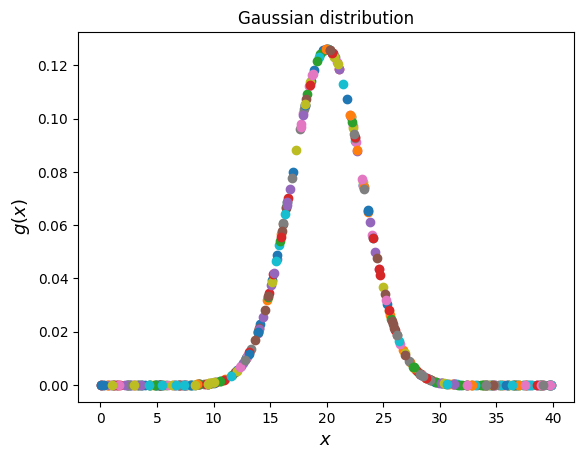

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import random

# normal distribution
def gaussiana(x, m, s):
    return ( 1/( s * np.sqrt(2 * np.pi) ) ) * np.exp(-0.5 * ( (x - m)/s )**2)

# média
m = 20

# variância
v = np.sqrt(10)

for i in range(50):
    xi = np.random.rand(8)*(m*2)
    plt.scatter(xi, gaussiana(xi, m, v))

# legenda, label e título
plt.xlabel("$x$", fontsize=13)
plt.ylabel("$g(x)$", fontsize=13)
plt.title('Gaussian distribution')
plt.show()

O Teorema do Limite Central afirma que a média de uma amostra de **n** elementos de uma população tende a uma distribuição gaussiana. Então, ao aumentarmos o número de pontos das amostras de 8 para 100, obtemos:

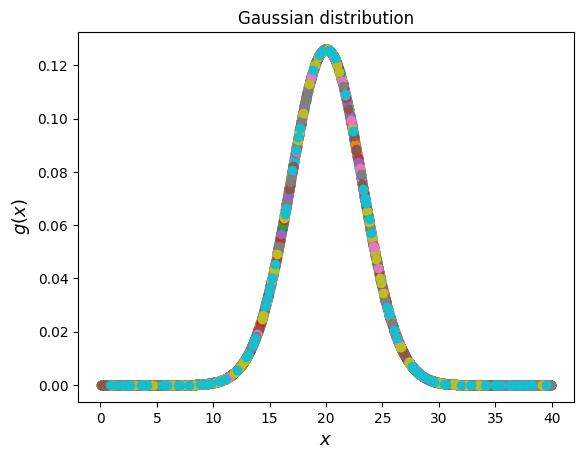

In [80]:
for i in range(50):
    xi = np.random.rand(100)*(m*2)
    plt.scatter(xi, gaussiana(xi, m, v))

# legenda, label e título
plt.xlabel("$x$", fontsize=13)
plt.ylabel("$g(x)$", fontsize=13)
plt.title('Gaussian distribution')
plt.show()

2) Consider the galaxy cluster catalogues named WHL12.dat and WHL12-rich.dat.

a) Plot a histogram of the redshift distribution of the objects in both catalogues – fourth column from left to right. State what is the bin width assumed in these plots.

b) Fit a Gaussian curve over those histograms. What is the mean, variance and higher order momenta (skewness and kurtosis) obtained for each case? Tip: You can use python fitting routines to perform this procedure.

In [81]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# dados de WHL12.dat
data = np.genfromtxt('/content/gdrive/MyDrive/Astroestatística/WHL12.dat', delimiter=', ')

z = data[3]

# dados de WHL12-rich.dat
data2 = np.genfromtxt('/content/gdrive/MyDrive/Astroestatística/WHL12_rich.dat', delimiter=', ')

z2 = data2[3]

plt.hist(z, bins=10, label='WHL12')
plt.hist(z2, bins=10, label='WHL12_rich')

# legenda, label e título
plt.xlabel("$z$")
plt.ylabel("$N$")
plt.legend(loc='best')
plt.title('Redshift distribution')
plt.show()

3) Consider the cosmic chronometer measurements, namely H(z), in the data file hz.dat. Each column (left to right) represent the redshift (z), Hubble expansion rate (H(z)), its corresponding uncertainty ($\sigma$H(z)), while the last column can be neglected for the time being. Also consider that, in the standard cosmological model paradigm (flat $\Lambda$CDM), the Hubble expansion rate is given by:

$H(z) = H_0 ( \Omega_m (1+z)^3 + 1 - \Omega_m )^{1/2}$

Hence, $H_0$ denotes the Hubble Constant, and $\Omega_m$ consists on the total matter density parameter of the Universe. In other words, these are the free parameters that describe our model.

a) a An estimate of the $H_0$ best fit value using the cosmological model and data provided, i.e., the parameter value that best represents the data using the maximum likelihood method through $\chi^2$ minimisation. Fix $\Omega_m$ to $\Omega_m$ = 0.20, 0.30, and 0.40, and compare the results obtained for each case.

In [83]:

import urllib.request #usar biblioteca Pandas para ler o arquivo como um DataFrame e pular a primeira linha com o cabeçalho
import pandas as pd
from scipy.stats import chisquare as chi2

hz = pd.read_csv('/content/gdrive/MyDrive/Astroestatística/hz.dat', skiprows=2, delim_whitespace=True, names=['z', 'H', 'sH'])

z = hz["z"]
H = hz["H"]
sigma_H = hz["sH"]

Om = 0.20
h0 = np.linspace(60, 80, 1000)

x2 = []
for h in h0:
    hteo = h * ( ( Om * (1+z)**3 + (1 - Om) )**(1/2) )
    x3 = sum( (H - hteo) / sigma_H )**2
    x2.append(x3)

for i in range(len(x2)):
    if x2[i] == min(x2):
        best = h0[i]

print(h0[i])

80.0


In [84]:
Om = 0.30
h0 = np.linspace(60, 80, 1000)

x2 = []
for h in h0:
    hteo = h * ( ( Om * (1+z)**3 + (1 - Om) )**(1/2) )
    x3 = sum( (H - hteo) / sigma_H )**2
    x2.append(x3)

for i in range(len(x2)):
    if x2[i] == min(x2):
        best = h0[i]

print(h0[i])

80.0


In [85]:
Om = 0.40
h0 = np.linspace(60, 80, 1000)

x2 = []
for h in h0:
    hteo = h * ( ( Om * (1+z)**3 + (1 - Om) )**(1/2) )
    x3 = sum( (H - hteo) / sigma_H )**2
    x2.append(x3)

for i in range(len(x2)):
    if x2[i] == min(x2):
        best = h0[i]

print(h0[i])

80.0


4) Consider the data provided in the data-hmwrk01-ex4.dat file. Let us assume that these value represent the number counts of quasars across 20 disjoint sky regions of the same angular size. Perform a resampling procedure using the bootstrap method with N = 100, N = 1000 and N = 10000. What is the mean and standard deviation obtained from them? Plot the results and explain.

In [98]:
# baixando os dados
data4 = pd.read_csv('/content/gdrive/MyDrive/Astroestatística/data_hmwrk01_ex4.dat.dat', skiprows=2, delim_whitespace=True, names=['quasars'])

dados = data4["quasars"]

bootstrap1 = []
for i in range(100):
    bootstrap1.append(random.choice(dados))

bootstrap2 = []
for i in range(1000):
    bootstrap2.append(random.choice(dados))

bootstrap3 = []
for i in range(1000):
    bootstrap3.append(random.choice(dados))

# printando os valores
print("Para a amostra original")
print('Média: {:.3f}; Desvio padrão: {:.3f} \n'.format(np.mean(dados), np.std(dados)))

print("Para N = 100:")
print('Média: {:.3f}; Desvio padrão: {:.3f} \n'.format(np.mean(bootstrap1), np.std(bootstrap1)))

print("Para N = 1000:")
print('Média: {:.3f}; Desvio padrão: {:.3f} \n'.format(np.mean(bootstrap2), np.std(bootstrap2)))

print("Para N = 10000:")
print('Média: {:.3f}; Desvio padrão: {:.3f} \n'.format(np.mean(bootstrap3), np.std(bootstrap3)))

Para a amostra original
Média: 32.236; Desvio padrão: 3.852 

Para N = 100:
Média: 32.006; Desvio padrão: 4.055 

Para N = 1000:
Média: 32.259; Desvio padrão: 3.969 

Para N = 10000:
Média: 32.308; Desvio padrão: 3.828 

